### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

自变量是实验条件：一致文字条件与不一致文字条件   
因变量是参与者说出同等大小的列表中的墨色名称的时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

零假设：假设两种条件下，参与者说出同等大小的列表的墨色名称的时间相同，即H0：μ<=μ0，其中H0表示零假设；μ0表示一致文字条件下参与者说出同等大小的列表的墨色的时间的样本均值；u1表示不一致文字条件下参与者说出同等大小列表的墨色的时间样本均值。  
对立假设：不一致文字条件下，参与者说出墨色的时间大于一致文字条件下参与者说出墨色颜色的时间，即HA:μ>μ0，其中HA表示对立假设；μ0表示一致文字条件下参与者说出同等大小的列表的墨色的时间的样本均值；u1表示不一致文字条件下参与者说出同等大小列表的墨色的时间的样本均值   
此实验中，同样的参与者参与两次不同条件的实验，属于配对检验；方差未知，故采用t检验；对立假设为u>u0,检验方向为右侧单尾检验

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [48]:
# 在这里执行你的分析
#调用库
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from scipy import stats

In [49]:
#读取数据，并打印前5行，对比数据大小
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


第一列Congruent为一致文字条件下得到的结果数值，第二列Incongruent为不一致文字条件下得到的结果数值。从打印出的前5列数值可以看出，不一致文字条件下的结果普遍比一致文字条件下的结果偏大。

In [50]:
#查看描述统计信息
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


通过描述统计信息可以看出：  
Congruent条件下反应时间均值为14.05秒，反应时间中位数为14.36秒，标准差3.56秒；  
Incongruent条件下反应时间均值为22.01秒，反应时间中位数为21.01秒，标准差为4.80秒

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

Text(0.5,1,'Time taken of two conditions')

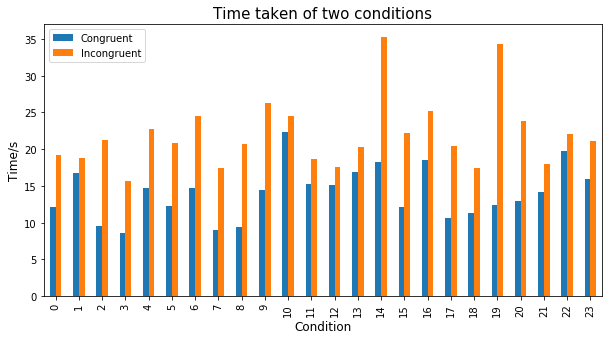

In [51]:
#创建可视化
#生成柱状图，比较两组结果的可视化效果
df.plot(kind='bar',figsize=(10,5))
plt.xlabel('Condition',fontsize=12)
plt.ylabel('Time/s',fontsize=12)
plt.title('Time taken of two conditions',fontsize=15)

通过双柱状图可以看出，在不一致文字条件下，参与者说出墨色的时间普遍多于一致文字的条件下所用的时间。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [31]:
#提取一致文字条件下的结果，并赋值给rvs1
rvs1 = df['Congruent']
rvs1.head()

0    12.079
1    16.791
2     9.564
3     8.630
4    14.669
Name: Congruent, dtype: float64

In [20]:
#提取文字不一致条件下的结果，并赋值给rvs2
rvs2 = df['Incongruent']
rvs2.head()

0    19.278
1    18.741
2    21.214
3    15.687
4    22.803
Name: Incongruent, dtype: float64

In [45]:
#使用scipy中的相关统计学模块，计算配对t检验的统计值及p值
t_statistic,pvalue_double=stats.ttest_rel(rvs2,rvs1)
t_statistic,pvalue_double

(8.020706944109957, 4.103000585711178e-08)

In [47]:
#右侧单尾检验的p值为双尾检验p值的一半
pvalue_right = pvalue_double / 2
t_statistic,pvalue_right

(8.020706944109957, 2.051500292855589e-08)

统计t值为8.02，右侧单尾检测p值为2.051500292855589e-08

取显著性水平α=0.05（置信水平95%），样本大小24，自由度df为24-1=23，对右侧单尾检验，由α和df查表得t临界值t_critical=1.714     
t_statistic > t_critical,t统计值落在拒绝域，同时p值小于0.05，故我们拒绝原假设，即两种条件下，参与者说出同等大小的列表的墨色名称的时间相同，并接受对立假设，即不一致文字条件下，参与者说出墨色的时间大于一致文字条件下参与者说出墨色颜色的时间